<h1 align="center">Radiación de cuerpo negro: leyes de Wien y de Stefan-Botlzmann</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

Ejemplo trabajado para anlizar las leyes de Wien y Stefan-Boltzmann empleando el simulador [*blackbody spectrum* PeTH](https://phet.colorado.edu/sims/html/blackbody-spectrum/latest/blackbody-spectrum_es.html).

## 1. Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Datos

In [2]:
T = 'T [K]'
L = r'$\lambda_{max}$ $[\mu m]$'
E_max = r'$E_{max}$ $[M W /μm m^2]$'
I = r'$I$ $[W/m^2]$'
columns = [T, L, E_max, I]
data_array = np.array([
    [ 200, 14.489,	4.00E-06,	9.07E+01],
    [ 450,  6.439,	2.00E-04,	2.33E+03],
    [ 950,  3.050,	1.00E-02,	4.62E+04],
    [1500,  1.932,	1.00E-01,	2.87E+05],
    [2000,  1.449,	4.10E-01,	9.07E+05],
    [2500,  1.159,	1.26E+00,	2.22E+06],
    [3000,  0.966,	3.13E+00,	4.59E+06],
    [3500,  0.828,	6.76E+00,	8.51E+06],
    [4050,  0.715,	1.40E+01,	1.53E+07],
    [4500,  0.644,	2.37E+01,	2.33E+07],
    [4950,  0.585,	3.82E+01,	3.40E+07],
    [5500,  0.527,	6.48E+01,	5.19E+07],
    [5800,  0.500,	8.45E+01,	6.42E+07],
])
data = pd.DataFrame(data_array, columns=columns)
data

,T [K],$\lambda_{max}$ $[\mu m]$,$E_{max}$ $[M W /μm m^2]$,$I$ $[W/m^2]$
0,200.0,14.489,0.000004,90.7
1,450.0,6.439,0.000200,2330.0
2,950.0,3.050,0.010000,46200.0
3,1500.0,1.932,0.100000,287000.0
4,2000.0,1.449,0.410000,907000.0
5,2500.0,1.159,1.260000,2220000.0
6,3000.0,0.966,3.130000,4590000.0
7,3500.0,0.828,6.760000,8510000.0
8,4050.0,0.715,14.000000,15300000.0
9,4500.0,0.644,23.700000,23300000.0


## 3. Leyes de la radiación del cuerpo negro
### 3.1. Ley de desplazamiento de Wien

La ley de deplazamiento de Wien relaciona la temperatura del cuerpo negro $T$ con la longitud de onda $\lambda_{max}$ a la cual se presenta la mayor densidad de potencia espectral $E(\lambda, T)$, $$\lambda_{max}T = b$$
Donde $b = 2.8976\times 10^{-3} [mK]$ es la constante de Wien.

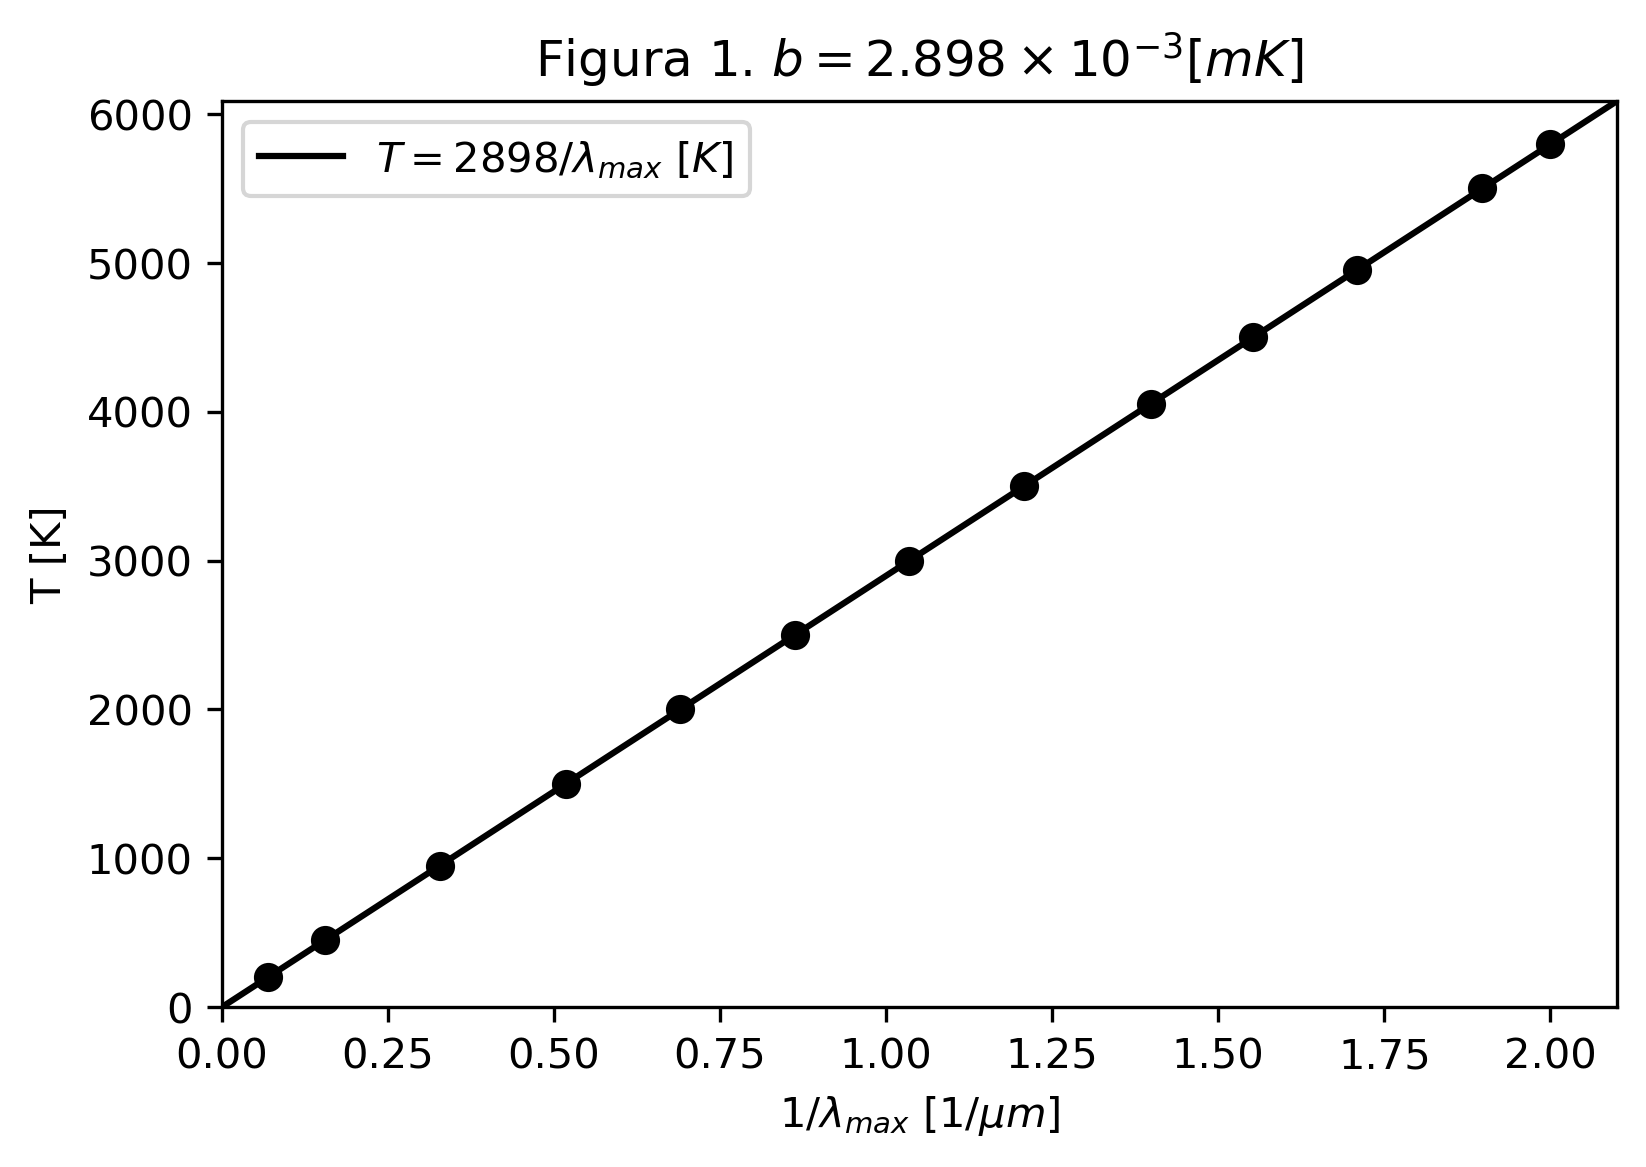

In [3]:
x = 1/data[L]
y = data[T]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=300)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$T = %0.4g / \lambda_{max}$ $[K]$' % p[0])
plt.legend()
plt.ylabel(T)
plt.xlabel(r'$1/\lambda_{max}$ $[1/\mu m]$')
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'Figura 1. $b = %0.4g \times 10^{-3} [mK]$' % (1e-3*p[0]))

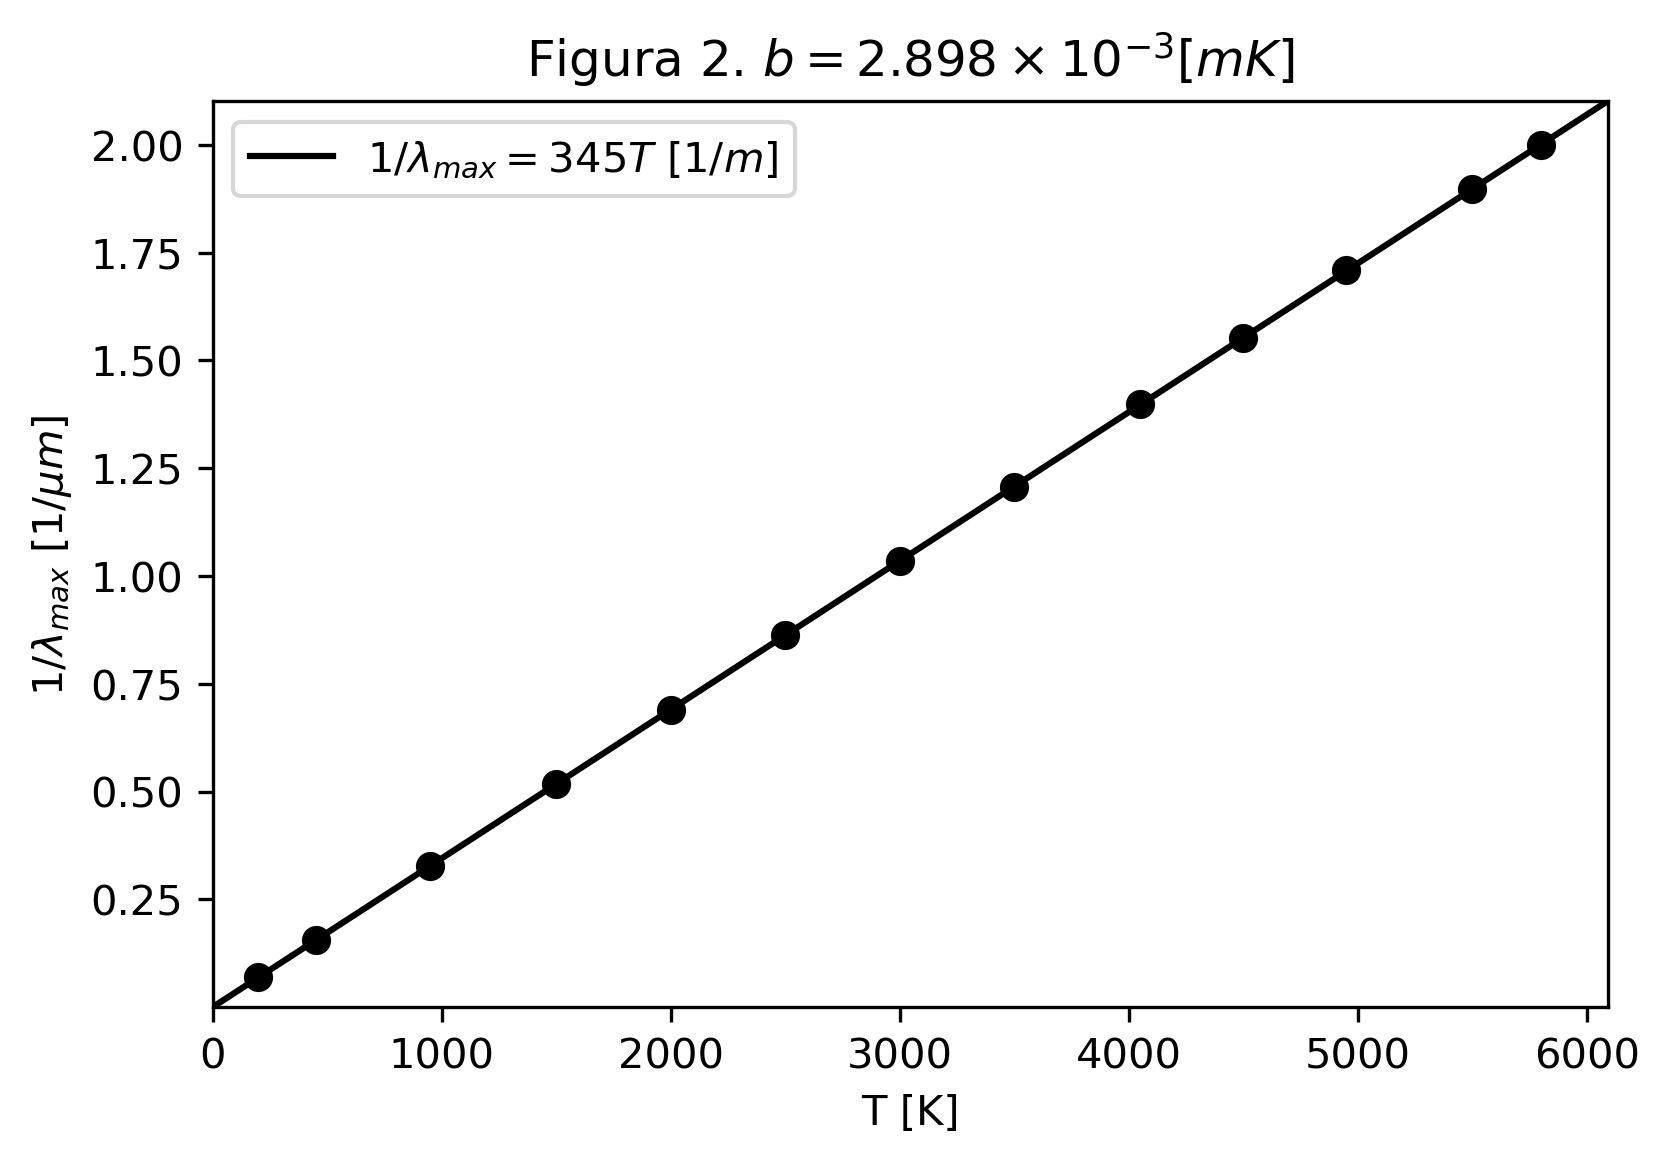

In [4]:
x = data[T]
y = 1/data[L]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=300)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$1/\lambda_{max}=%0.4g T$ $[1/m]$' % (1e6*p[0]))
plt.legend()
plt.xlabel(T)
plt.ylabel(r'$1/\lambda_{max}$ $[1/\mu m]$')
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'Figura 2. $b = %0.4g \times 10^{-3} [mK]$' % (1e-3/p[0]))

### 3.2. Ley de Stefan-Boltzmann
Esta ley establece que la intensidad $I$, es decir, el área bajo la curva de densidad de potencia espectral $I(T) = \int{E(\lambda, T)d\lambda}$, es proporcional a la cuarta potencia de la temperatura, $$ I(T)=\sigma T^4$$

Donde $\sigma = 5.67\times 10^{-8} [W/m^2K^4]$.

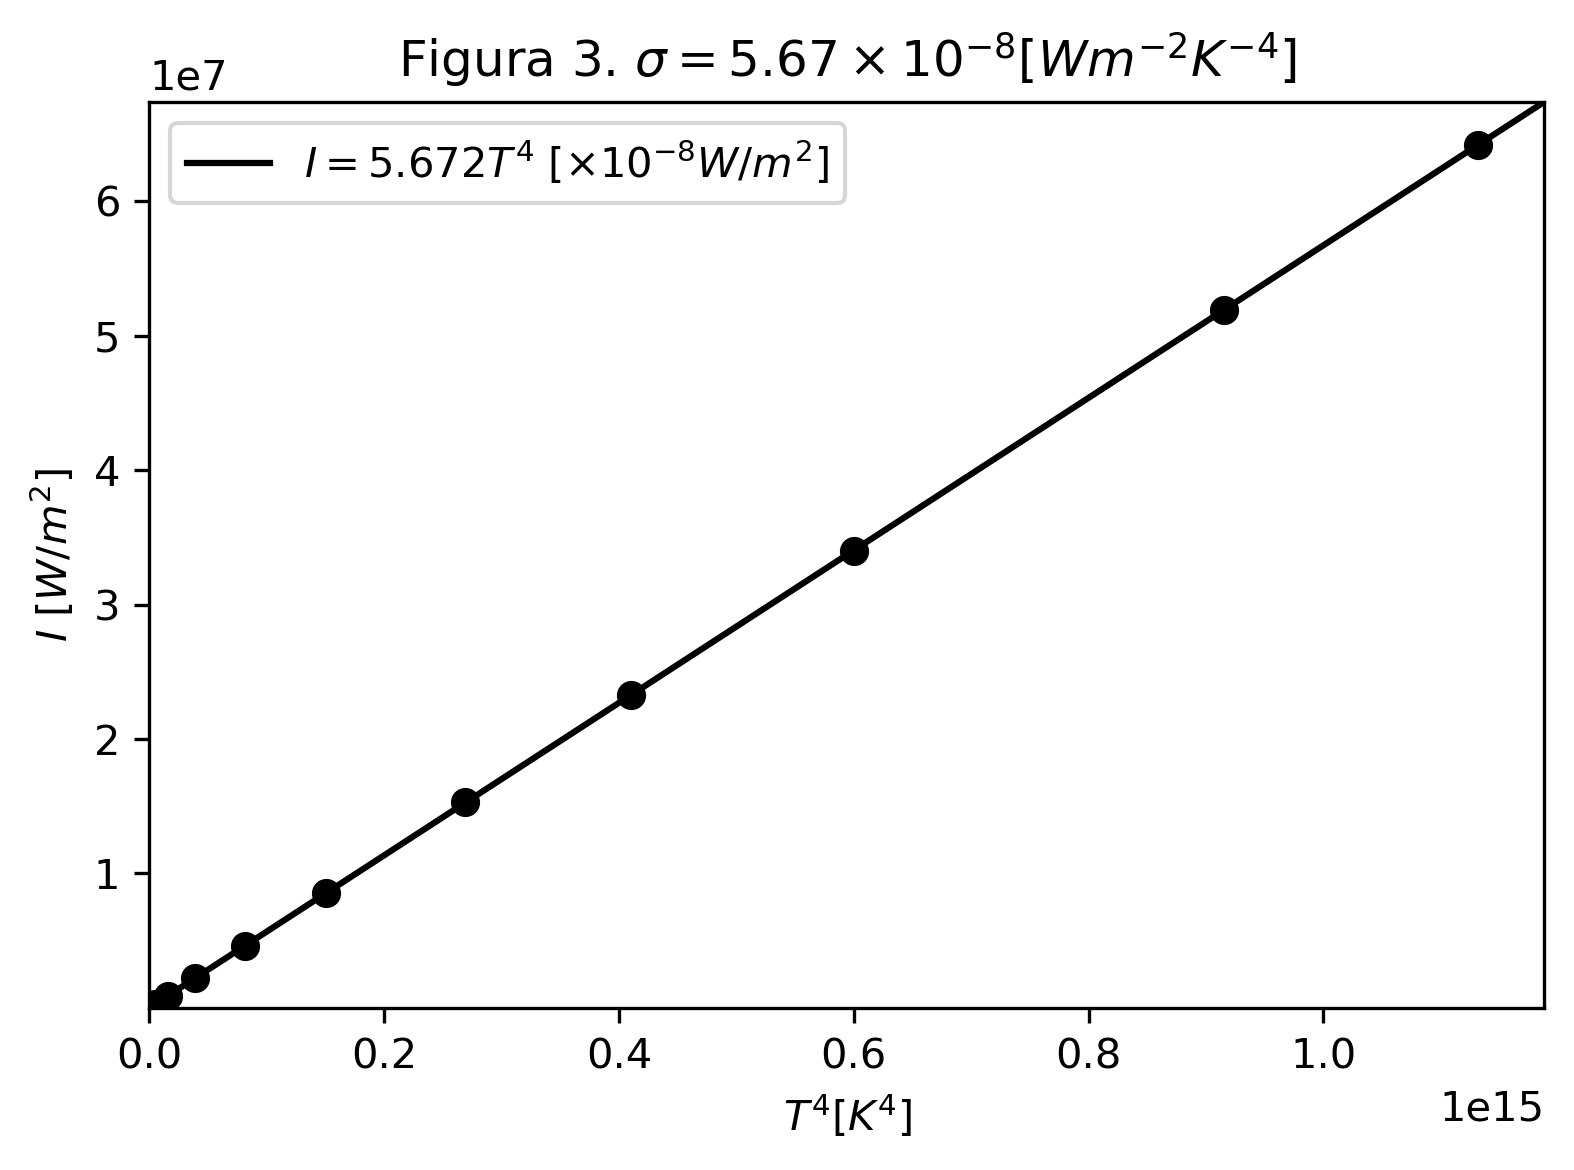

In [5]:
x = data[T]**4
y = data[I]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=300)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$I=%0.4g T^4$ $[\times 10^{-8}W/m^{2}]$' % (1e8*p[0]))
plt.legend()
plt.xlabel(r'$T^4 [K^4]$')
plt.ylabel(I)
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'Figura 3. $\sigma = %0.3g \times 10^{-8} [Wm^{-2}K^{-4}]$' % (1e8*p[0]))

### 3.3. Ley de Planck

El valor medio de la nergía de los fotones por unidad de volumen en ambas direcciones de polarización, en el rango de frecuencias angulares entre $\omega$ y $\omega + d\omega$, 

$$\bar{u}(\omega; T) = \frac{\hbar}{\pi^2 c^3} \frac{\omega^2 d\omega}{e^{\beta \hbar \omega} - 1}$$

En términos de $\eta = \frac{\hbar \omega}{k_B T}$ y tomando $u_0 = \frac{\hbar}{\pi^2 c^3} \left( \frac{k_B T}{\hbar} \right)^4$,

$$\frac{\bar{u}(\omega; T)}{u_0} d\omega = \frac{\eta^3 d\eta}{e^{\eta} - 1}$$

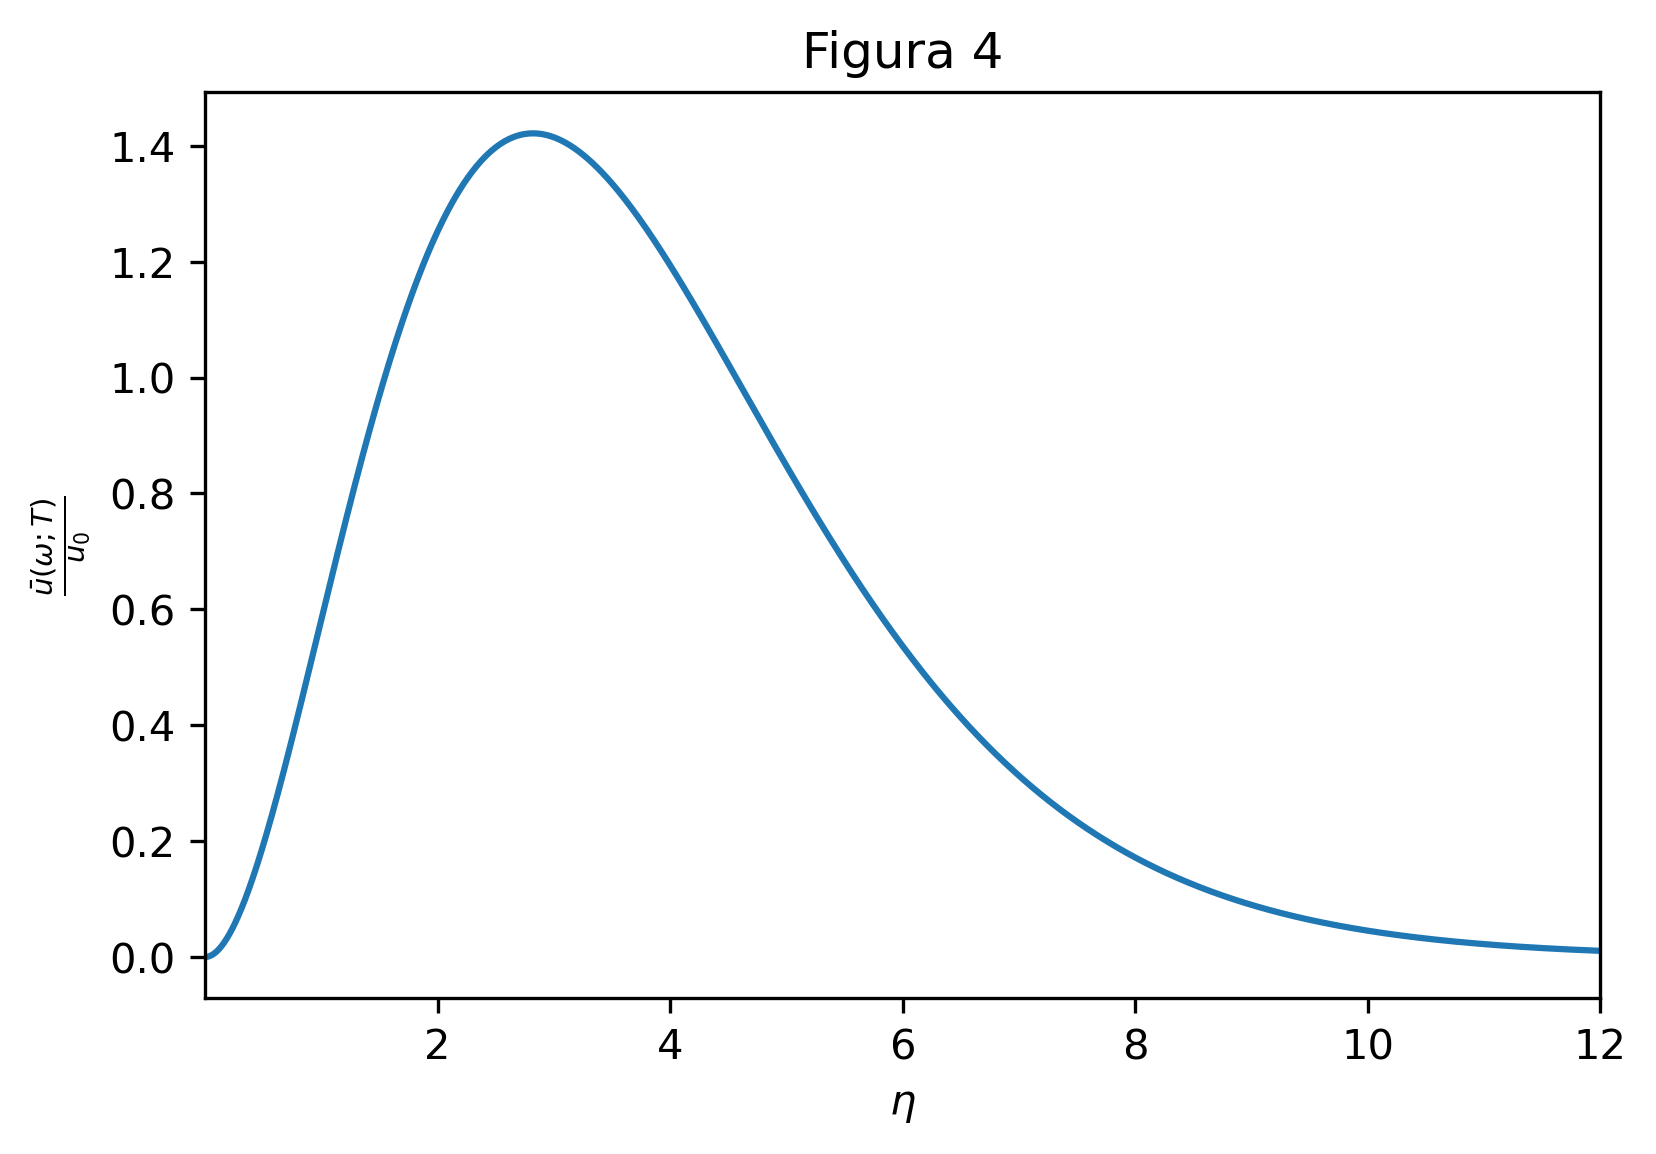

In [6]:
η = np.linspace(1e-3, 12, 2000)
u_uo = η**3 / ( np.exp(η) - 1)
plt.figure(dpi=300)
plt.plot(η, u_uo)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\frac{\bar{u}(\omega; T)}{u_0}$')
plt.xlim(min(η), max(η))
_ = plt.title('Figura 4')

## 4. Preguntas de autoexplicación

4.1. En qué consiste la catastrofe ultravioleta.

4.2. ¿Cómo resolvió Plank la catastrofe ultravioleta?

4.3. ¿Cuáles son las similitudes y diferencias entre las figuras 1 y 2? 

4.4. Explique, con sus propias palabras, en qué consiste la ley de Wien.

4.5. Explique, con sus propias palabras, en qué consiste la ley de Stefan-Boltzmann e interprete la figura 3.

4.6. Realice una gráfica, con los datos obtenidos, de la longitud de onda máxima en función de la temperatura.  En la misma figura muestre la ley de Wien. ¿Qué se observa en la figura?

4.7. Realice una gráfica, con los datos obtenidos, de la intensidad radiada en función de la temperatura.  En la misma figura muestre la ley de Stefan-Boltzmann.  ¿Qué observa en la figura?

4.8. ¿Cómo se relacionan los resultados obtenidos con el simulador con la ley de Planck para la radiación de cuerpo negro?

End!